<center> <h1>Algorithms in Computational Biology (INFO-F438)</h1> </center>

<center> <h2>Assignment 2: Shortest Common Superstring</h2> </center>



In [8]:
import itertools
from datetime import datetime
import random
import numpy as np
import matplotlib.pyplot as plt


def generate_string(str_length, str_nbr, alphabet='ACGT'):
    '''
    generate a list of 'str_nbr' strings of length 'str_length'
    :param str_length: integer
    :param str_nbr: integer
    :param alphabet: string, by default 'ACGT'
    :return: list of strings
    '''
    l = []
    for j in range(str_nbr):
        l += [''.join([random.choice(alphabet) for i in range(str_length)])]
    return l


def merge(str1, str2):
    '''
    merge two strings with overlap if possible otherwise without
    ex: merge('ABCD', 'CDEF') returns 'ABCDEF'
    :param str1: string
    :param str2: string
    :return: merged string
    '''
    merged_str = ""
    for i in range(len(str1)):
        if str1[len(str1)-(1+i):] == str2[:1+i]:
            merged_str = str1[:-(1+i)]+str2
    if merged_str == "":
        merged_str = str1 + str2
    return merged_str


def merging_length(str1, str2):
    '''
    determine the merging length between two different strings.
    If str1 = str2, the merging length is zero.
    ex: merging_length('ABCD', 'BCDEF') returns 3
    :param str1: string
    :param str2: string
    :return: integer
    '''
    ml = 0
    if str1 != str2:
        for i in range(len(str1)):
            if str1[len(str1)-(1+i):] == str2[:1+i]:
                ml = 1+i
    return ml


def higher_merging_length(array, l):
    '''
     search for the largest integer in an array, determines the corresponding
     row and column, search for the corresponding strings to merge from the list l
     and finally returns the two strings and the corresponding row and column
     ex: higher_merging_length([[0,1,0],[2,0,3],[2,1,0]], ['ABBA','ADAB','DABAB']) returns
     ('ADAB', 'DABAB', 1, 2)
                       ABBA    ADAB    DABAB
                ABBA    0       1        0
      From      ADAB    2       0        3       , we expect ('ADAB', 'DABAB', 1, 2)
                DABAB   2       1        0
    :param array: numpy array or classic array (list of lists)
    :param l: list of strings of the same length than len(array)
    :return: a tuple with two strings and two integers
    '''
    hml, str1, str2, r, c = 0, '', '', None, None
    for i in range(len(array)):
        for j in range(len(array)):
            if i != j and array[i][j] >= hml:
                hml = array[i][j]
                str1, str2 ,r , c = l[i], l[j], i, j
    return(str1, str2, r, c)


def delete_r_and_c(matrix, li, column, row):
    '''
    deletes corresponding indexes 'row' and 'column' of a 'matrix' and deletes
    strings of index 'row' and 'column' from a list 'li'
    :param matrix: an array
    :param li: a list
    :param column: an integer
    :param row: an integer
    :return: an array
    '''
    if column > row:
        del li[column]
        del li[row]
        matrix = np.delete(matrix, column, 1)
        matrix = np.delete(matrix, row, 1)
        matrix = np.delete(matrix, column, 0)
        matrix = np.delete(matrix, row, 0)
    else:
        del li[row]
        del li[column]
        matrix = np.delete(matrix, row, 1)
        matrix = np.delete(matrix, column, 1)
        matrix = np.delete(matrix, row, 0)
        matrix = np.delete(matrix, column, 0)
    return matrix


def Exhaustive_Shortest_Common_Superstring(ll, all = False):
    '''
    search for the Shortest Common Superstring from a list 'll' of strings with an exhaustive method
    and if all = True, retunrs all Shortest Common Superstrings if there is several with
    the same length and if all = False, returns the last Shortest Common Superstring found.
    :param ll: a list of strings with at least three strings
    :param all: a boolean: True or False
    :return: a string
    '''
    length_max_ESCS, ESCS = 0, []
    for i in range(len(ll)):
        length_max_ESCS += len(ll[i])
    for t in itertools.permutations(ll):   # for each permutation of the ll list
        l = list(t)
        while len(l) !=1:
            merged_strings = merge(l[0],l[1])
            del(l[:2])     #delete the two first strings
            l = [merged_strings] + l     # add the merged string at the first place
        if all == False:
            if len(l[0]) < length_max_ESCS:
                length_max_ESCS = len(l[0])
                ESCS = [l[0]]
        elif all == True:       # to obtain a list of all possible ESCS
            if len(l[0]) < length_max_ESCS:
                length_max_ESCS = len(l[0])
                del(ESCS[:])
                ESCS = [l[0]]
            elif len(l[0]) == length_max_ESCS:
                ESCS += [l[0]]
    return ESCS


def Greedy_Shortest_Common_Superstring(ll):
    '''
    search for the Shortest Common Superstring from a list 'll' of strings with a greedy method
    :param ll: a list of strings with at least two strings
    :return: a string
    '''
    l, GSCS = ll[:], ""
    nb_of_strings= len(l)
    # creation of matrix matrice nb_of_string*nb_of_string full of 0
    m = np.zeros((nb_of_strings, nb_of_strings))
    # matrix filling with corresponding merging length
    for i in range(nb_of_strings):
        for j in range(nb_of_strings):
            m[i][j] = merging_length(l[i], l[j])
    length_m = len(m)
    while length_m >2:
        # search for the largest number in the matrix m to select which strings to merge
        str1, str2, r, c = higher_merging_length(m, l)[0], higher_merging_length(m, l)[1],\
                           higher_merging_length(m, l)[2], higher_merging_length(m, l)[3]
        # merged string building
        merged_str = merge(str1, str2)
        m = delete_r_and_c(m, l, c, r)
        # adding of the merged string at the end of the list l
        l.append(merged_str)
        # adding of line of 0 and column of 0 in the matrix m (at the end)
        length_m = len(m)
        m = np.insert(m, length_m, 0, axis= 0)
        m = np.insert(m, length_m, 0, axis= 1)
        # calculates and fills the last row and the last column of the matrix
        length_m = len(m)
        for i in range(length_m):
            m[i][length_m-1] = merging_length(l[i], l[length_m-1])
            m[length_m - 1][i] = merging_length(l[length_m - 1], l[i])
    str1, str2, r, c = higher_merging_length(m, l)[0], higher_merging_length(m, l)[1], \
                       higher_merging_length(m, l)[2], higher_merging_length(m, l)[3]
    GSCS = merge(l[r], l[c])
    return GSCS

We can test the two algorithms by generating a list of DNA sequences and determine the computing time: 

In [2]:
dna = generate_string(3, 6)   # length of strings, number of strings
print("set = ", dna)

print('----------------------------')
print("Exhaustive Shortest Common Superstring :")
start = datetime.now()
SCS = Exhaustive_Shortest_Common_Superstring(dna, all= False)
print("one of the solutions :", SCS[0])
print("length of this solution = ", len(SCS[0]))
end = datetime.now()
elapsed = end - start
formatted_computation_time = float('%i.%.6i' % (elapsed.seconds, elapsed.microseconds))
print('computation time =',formatted_computation_time, 'seconds')


print('----------------------------')
print("Greedy Shortest Common Superstring :")
start = datetime.now()
GSCS = Greedy_Shortest_Common_Superstring(dna)
print('the solution :' ,GSCS)
print("length of the solution = ",len(GSCS))
end = datetime.now()
elapsed = end - start
formatted_computation_time = float('%i.%.6i' % (elapsed.seconds, elapsed.microseconds))
print('computation time =',formatted_computation_time, 'seconds')

set =  ['ATG', 'GTG', 'TAG', 'GGC', 'GGG', 'TTA']
----------------------------
Exhaustive Shortest Common Superstring :
one of the solutions : ATGTGGGCTTAG
length of this solution =  12
computation time = 0.022022 seconds
----------------------------
Greedy Shortest Common Superstring :
the solution : ATGTGTTAGGGC
length of the solution =  12
computation time = 0.002801 seconds


Now, we can check if the Shortest Common Superstring obtained with the greedy method belongs to the possible answers:

In [3]:
print('----------------------------')
SCS = Exhaustive_Shortest_Common_Superstring(dna, all= True)
print("set of possibilities: ", SCS)
print("number of possibilities = ", len(SCS))
if GSCS in SCS:
    print("the Greedy Shortest Common Superstring belongs to the set of possibilities!")
else:
    print("the Greedy Shortest Common Superstring doesn't belong to the set of possibilities!")

----------------------------
set of possibilities:  ['ATGTGGGCTTAG', 'ATGTGTTAGGGC', 'ATGGGCTTAGTG', 'ATGTTAGTGGGC', 'TTAGATGTGGGC', 'TTAGTGATGGGC', 'TTAGTGGGCATG', 'TTAGGGCATGTG']
number of possibilities =  8
the Greedy Shortest Common Superstring belongs to the set of possibilities!


We can compute a list of computation times according to the number of sequences with a fixed length of string (for exemple 5) for the exhaustive search algorithm: 

In [7]:
list_of_compution_time_for_exhaustive_search = []
for i in range(3, 12):
    start = datetime.now()
    SCS = Exhaustive_Shortest_Common_Superstring(generate_string(5, i), all= False)
    end = datetime.now()
    elapsed = end - start
    formatted_computation_time = float('%i.%.6i' % (elapsed.seconds, elapsed.microseconds))
    list_of_compution_time_for_exhaustive_search.append(formatted_computation_time)
print(list_of_compution_time_for_exhaustive_search)    

[0.000117, 0.000473, 0.003812, 0.042227, 0.183079, 1.729264, 19.320083, 266.79226, 3725.491226]


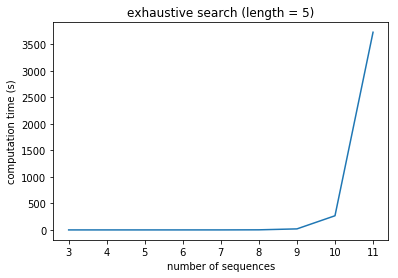

In [10]:
plt.plot(range(3, 12),list_of_compution_time_for_exhaustive_search)
plt.xlabel('number of sequences')
plt.ylabel('computation time (s)')  
plt.title('exhaustive search (length = 5)')
plt.show()

We can then compute a list of computation times according to the number of sequences with a fixed length of string (for exemple 5) for the greedy search algorithm: 

In [17]:
list_of_compution_time_for_greedy_search = []
for i in range(3, 300):
    start = datetime.now()
    SCS = Greedy_Shortest_Common_Superstring(generate_string(5, i))
    end = datetime.now()
    elapsed = end - start
    formatted_computation_time = float('%i.%.6i' % (elapsed.seconds, elapsed.microseconds))
    list_of_compution_time_for_greedy_search.append(formatted_computation_time)
print(list_of_compution_time_for_greedy_search) 

[0.000888, 0.001461, 0.001902, 0.003113, 0.003512, 0.003404, 0.004032, 0.003706, 0.008426, 0.005458, 0.005957, 0.007331, 0.006909, 0.007121, 0.008269, 0.008685, 0.009432, 0.010216, 0.010937, 0.011803, 0.01515, 0.017001, 0.017412, 0.01847, 0.018169, 0.020005, 0.020214, 0.023288, 0.024122, 0.026158, 0.028759, 0.030042, 0.032708, 0.034746, 0.038503, 0.042354, 0.043471, 0.045419, 0.050293, 0.051663, 0.053669, 0.056795, 0.062204, 0.065384, 0.070542, 0.074619, 0.075843, 0.081544, 0.086915, 0.087707, 0.090499, 0.099546, 0.102604, 0.106476, 0.114729, 0.118816, 0.121688, 0.131259, 0.148252, 0.154355, 0.150107, 0.153213, 0.180748, 0.181332, 0.175763, 0.181805, 0.185455, 0.191427, 0.202391, 0.211444, 0.217909, 0.223429, 0.233407, 0.243226, 0.247685, 0.261317, 0.271728, 0.280962, 0.288403, 0.296836, 0.313979, 0.316586, 0.329028, 0.345395, 0.351279, 0.357653, 0.372712, 0.376284, 0.396149, 0.410831, 0.416978, 0.43576, 0.444227, 0.453806, 0.466464, 0.494188, 0.498042, 0.515789, 0.524489, 0.540137, 0.

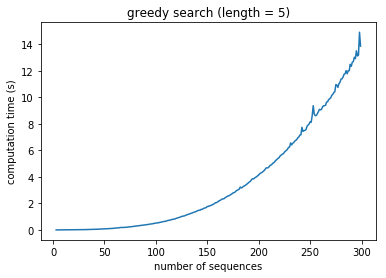

In [18]:
plt.plot(range(3, 300),list_of_compution_time_for_greedy_search)
plt.xlabel('number of sequences')
plt.ylabel('computation time (s)')  
plt.title('greedy search (length = 5)')
plt.show()

We can observe two different behaviours for the two algorithms, the first (exhaustive search) is very slower than the second (greedy search). For the exhaustive search, the limiting factor is the number of permutations and the exhaustive search follows a factorial function. And the greedy search follows an exponential function.   
Of course, the factorial function grows faster than any exponential function. Indeed, it should be noted that e^(n+1)= e*e^n , It means that each time we add a sequence, we multiply only by e = 2.71.. and besides, (n+1)! = (n+1)*n! it means that each time we add a sequence, we multiply by (n+1) which is larger than e.

Now, we can observe if changing the length of sequence has an impact on the computation time with the number of sequences fixed. For the exhaustive search algorithm, we have:

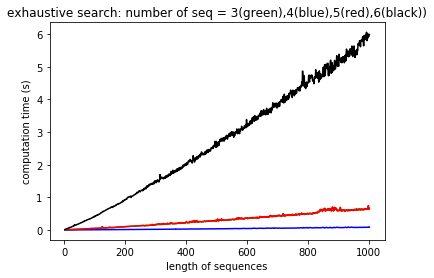

In [29]:
transition_list = []
list_of_compution_time_for_exhaustive_search_3 = []
list_of_compution_time_for_exhaustive_search_4 = []
list_of_compution_time_for_exhaustive_search_5 = []
list_of_compution_time_for_exhaustive_search_6 = []
for j in range(3,7):
    for i in range(3, 1003):
        start = datetime.now()
        SCS = Exhaustive_Shortest_Common_Superstring(generate_string(i, j), all= False)
        end = datetime.now()
        elapsed = end - start
        formatted_computation_time = float('%i.%.6i' % (elapsed.seconds, elapsed.microseconds))
        transition_list.append(formatted_computation_time)
    list_of_compution_time_for_exhaustive_search_3 = transition_list[0:1000]    
    list_of_compution_time_for_exhaustive_search_4 = transition_list[1000:2000]
    list_of_compution_time_for_exhaustive_search_5 = transition_list[2000:3000]
    list_of_compution_time_for_exhaustive_search_6 = transition_list[3000:4000]
plt.plot(range(3, 1003),list_of_compution_time_for_exhaustive_search_5, color = 'green')    
plt.plot(range(3, 1003),list_of_compution_time_for_exhaustive_search_4, color = 'blue')
plt.plot(range(3, 1003),list_of_compution_time_for_exhaustive_search_5, color = 'red')
plt.plot(range(3, 1003),list_of_compution_time_for_exhaustive_search_6, color = 'black')
plt.xlabel('length of sequences')
plt.ylabel('computation time (s)')  
plt.title('exhaustive search: number of seq = 3(green),4(blue),5(red),6(black))')
plt.show()

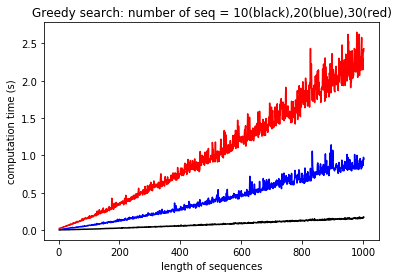

In [30]:
transition_list = []
list_of_compution_time_for_greedy_search_10 = []
list_of_compution_time_for_greedy_search_20 = []
list_of_compution_time_for_greedy_search_30 = []
for j in range(10,31,10):
    for i in range(3, 1003):
        start = datetime.now()
        SCS = Greedy_Shortest_Common_Superstring(generate_string(i, j))
        end = datetime.now()
        elapsed = end - start
        formatted_computation_time = float('%i.%.6i' % (elapsed.seconds, elapsed.microseconds))
        transition_list.append(formatted_computation_time)
    list_of_compution_time_for_greedy_search_10 = transition_list[0:1000]    
    list_of_compution_time_for_greedy_search_20 = transition_list[1000:2000]
    list_of_compution_time_for_greedy_search_30 = transition_list[2000:3000]
plt.plot(range(3, 1003),list_of_compution_time_for_greedy_search_10, color = 'black')    
plt.plot(range(3, 1003),list_of_compution_time_for_greedy_search_20, color = 'blue')
plt.plot(range(3, 1003),list_of_compution_time_for_greedy_search_30, color = 'red')
plt.xlabel('length of sequences')
plt.ylabel('computation time (s)')  
plt.title('Greedy search: number of seq = 10(black),20(blue),30(red)')
plt.show()

We can conclude that for both algorithms, the computation time as a function of the length of sequences is close enough a linear function, of course that's valid for sequences less than or equal to 1000.

Finally, we can count the errors of the greedy algorithm:

In [37]:
counter, list_of_errors = 0, []
while counter < 1000:
    dna = generate_string(5, 6)
    SCS = Exhaustive_Shortest_Common_Superstring(dna, all= True)
    GSCS = Greedy_Shortest_Common_Superstring(dna)
    if GSCS in SCS:
        list_of_errors.append(1)
    else:
        list_of_errors.append(0)
    counter += 1
nbr_of_errors = list_of_errors.count(0)
nbr_of_matching = list_of_errors.count(1)
print('number of matching =', nbr_of_matching, 'number of errors =',nbr_of_errors )    

number of matching = 874 number of errors = 126


We can see that we have some errors for greedy algorithm, I think that it comes from the way of choices in the matrix.